# CASE STUDY: OPERATIONS DEPARTMENT

## Key Learning Outcomes:
- Learn how to leverage the power of deep learning to improve processes.
- Understand the theory and intuition behind convolutional neural networks.
- Learn the history of deep learning algorithms and understand how to leverage the power of deep learning to perform image classification.
- Understand the theory and intuition behind residual networks, a state of the art deep neural network that are widely adopted in business and healthcare.
- Train resnets to perform image classification using real world datasets.
- Understand the intuition and power of transfer learning.
- List the various advantages of transfer learning and know when to properly apply the technique to speed upn training proecess.
- Evaluate trained resnet networks on testing data.
- Know the difference between various activation functions such as Sigmoid and Rectified Linear Units (RELU).
- Apply keras API to build deep convolutional neural networks.
- Understand the difference between precision and recall.
___
- **Operations + Deep Learning + Image Classification + Transfer Learning + Keras**
___


## TASK-1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE

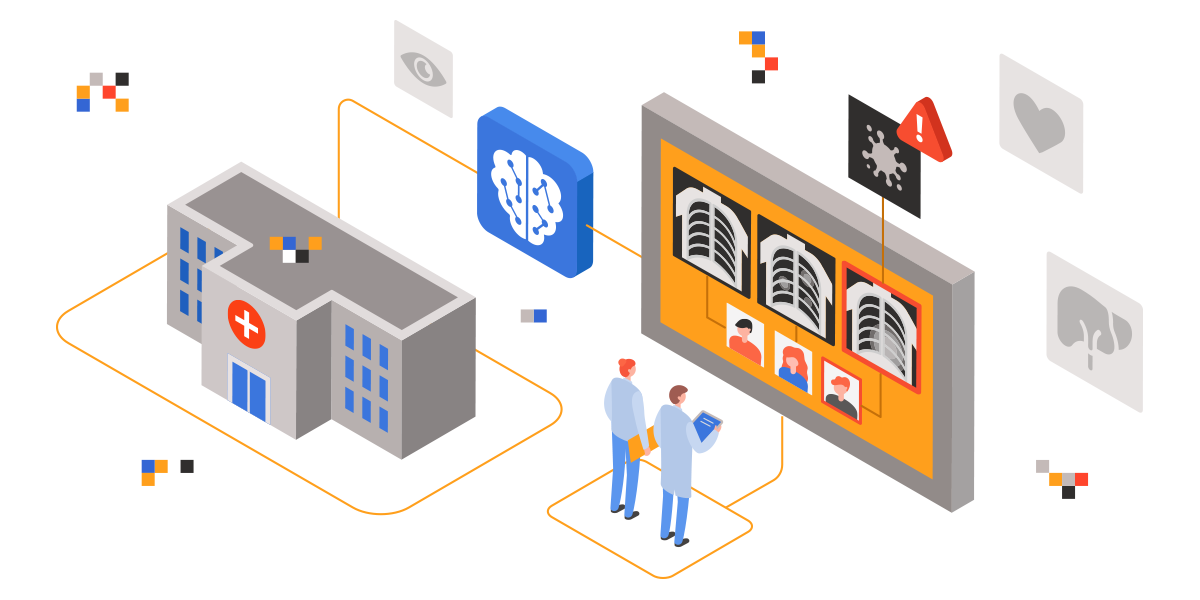

<center>
    <b>Figure1. Classifying disease using Deep Learning</b>
</center>

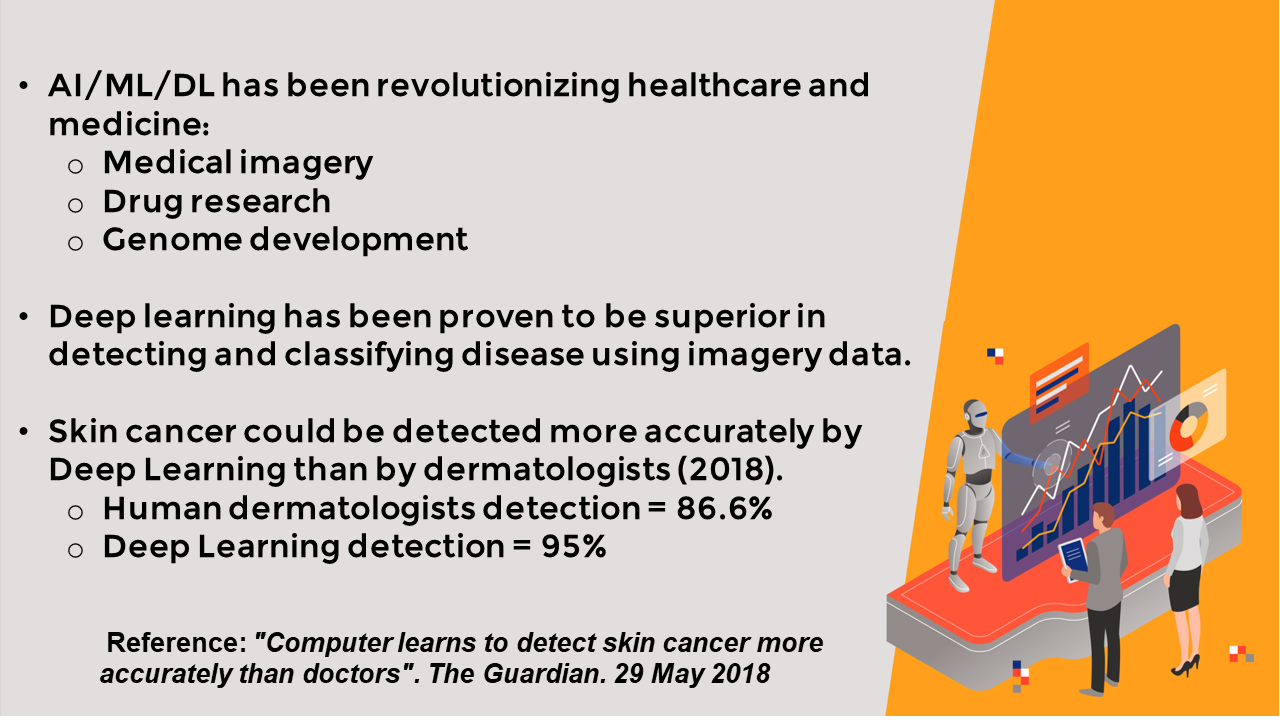

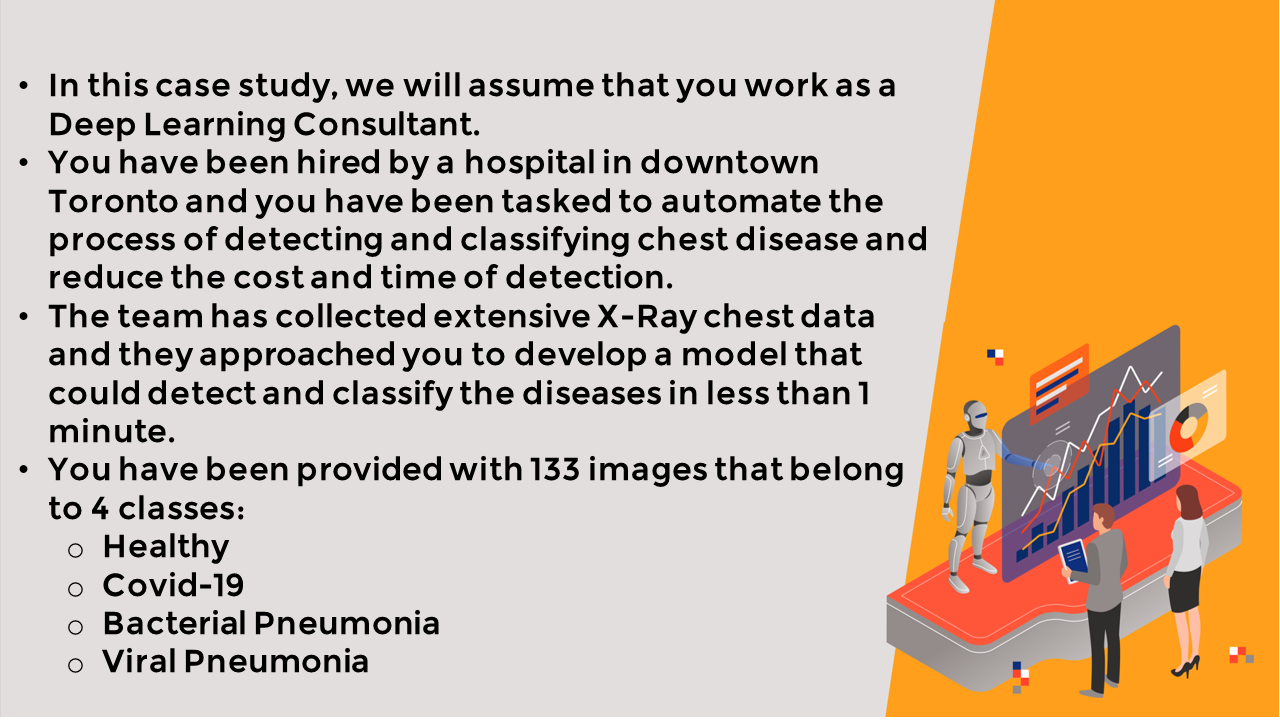

## TASK-2: IMPORT LIBRARIES AND DATASET

In [1]:
import os 
import cv2
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, optimizers
from tensorflow.keras.optimizers import legacy as legacy_optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# we need to mount our drive using the following commands (if we are using google colab):
# for more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# specify training data directory
XRay_Directory = r'C:\Users\mani2\Documents\Data Science For Business\datasets\Operations_data\Chest_X_Ray\Dataset'

In [4]:
# list the folders in the directory
os.listdir(XRay_Directory)

['0', '1', '2', '3']

In [5]:
# use image generator to generate tensor images data and normalize them

# Note: we use 20% of data for cross-validation
image_generator = ImageDataGenerator(rescale= 1./255, validation_split= 0.2)

- Generate batches of 40 images
- Total number of images is 133*4 = 543 images
- Training is 428 (80%) and validation is 104 (20%)
- Perform shuffling and image resizing

In [6]:
train_generator = image_generator.flow_from_directory(batch_size= 40, directory= XRay_Directory, shuffle= True,
                                                     target_size= (256, 256), class_mode= 'categorical', subset= 'training')

Found 428 images belonging to 4 classes.


In [7]:
validation_generator = image_generator.flow_from_directory(batch_size= 40, directory= XRay_Directory, shuffle= True,
                                                    target_size= (256, 256), class_mode = 'categorical', subset= 'validation')

Found 104 images belonging to 4 classes.


In [8]:
# Generate a batch of 40 images and labels
train_images, train_labels = next(train_generator)

In [9]:
train_images.shape

(40, 256, 256, 3)

In [10]:
train_labels.shape

(40, 4)

In [11]:
train_labels

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]],

In [12]:
# labels Translator
label_names = {0: 'Covid-19', 1: 'Normal', 2: 'Pneumonia', 3: 'Bacterial Pneumonia'}

### TASK-3: VISUALIZE DATASET

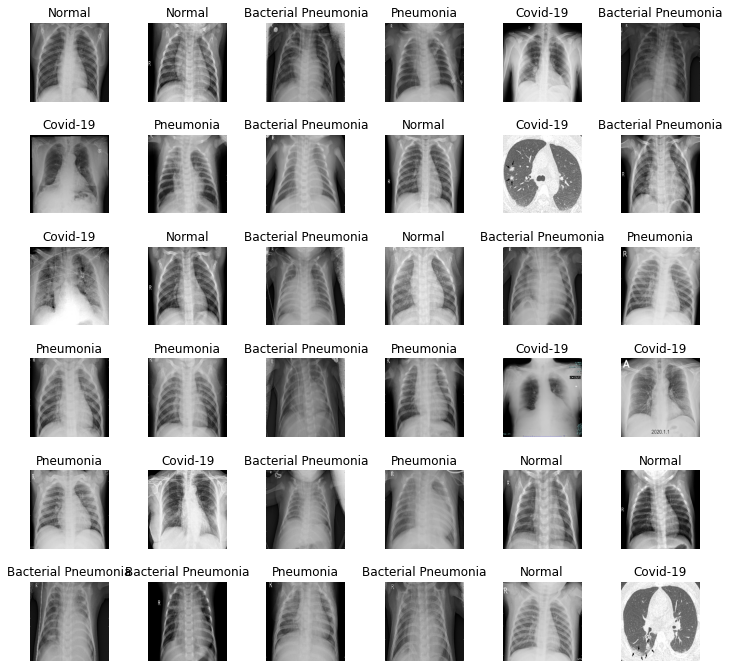

In [13]:
# create a grid of 36 images along with their corresponding labels
L = 6
W = 6

fig, axes = plt.subplots(L, W, figsize= (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(train_images[i])
    axes[i].set_title(label_names[np.argmax(train_labels[i])])
    axes[i].axis('off')
    
plt.subplots_adjust(wspace= 0.5)

### TASK-4: UNDERSTAND THE THEORY AND INTUITION BEHIND DEEP NEURAL NETWORKS

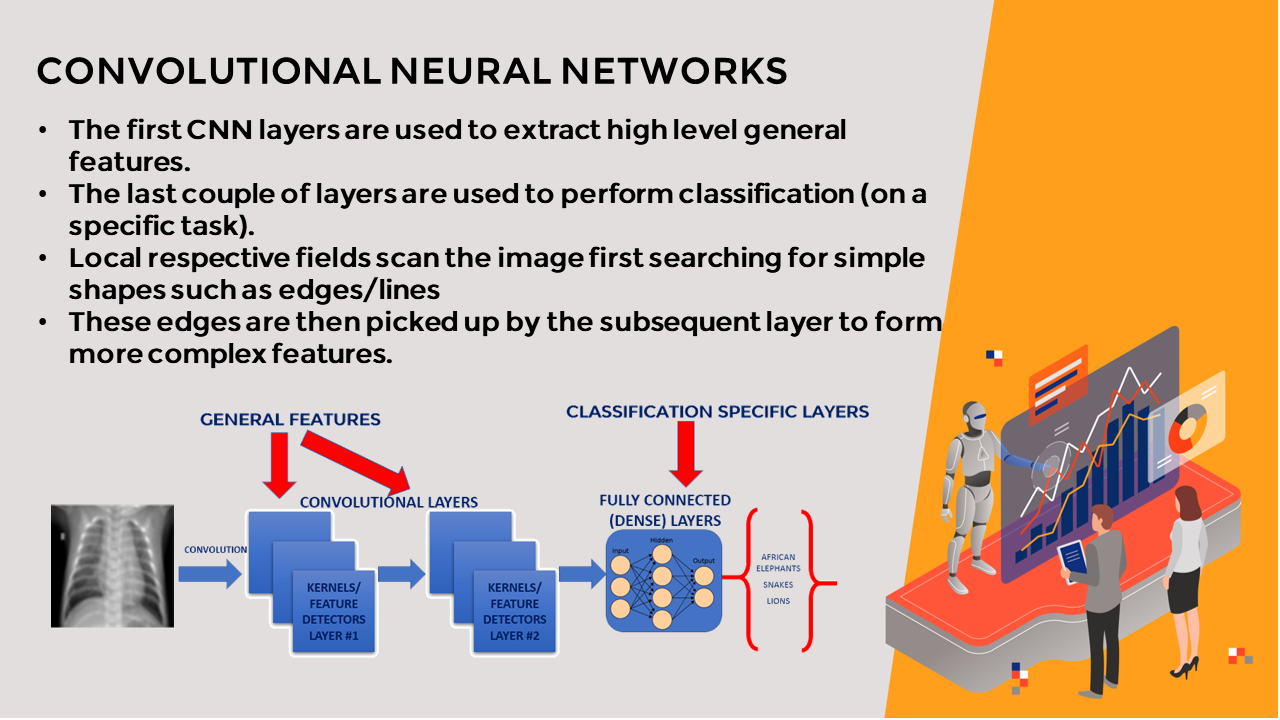

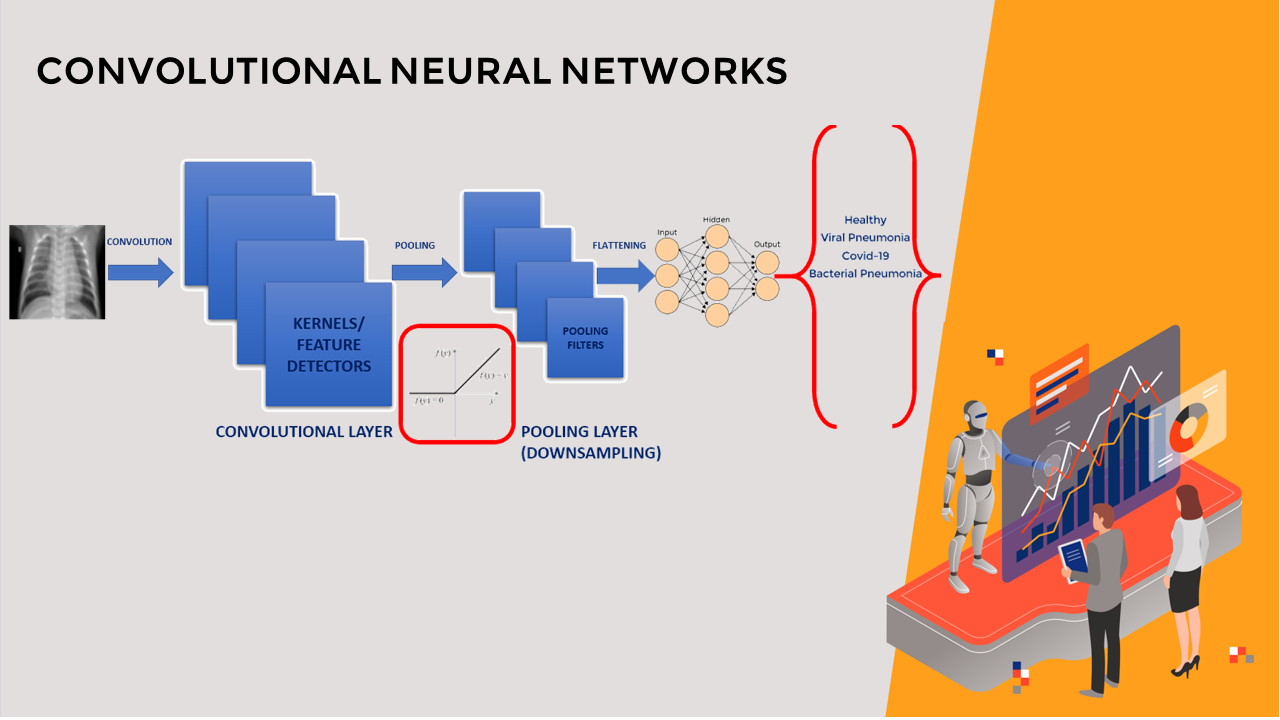

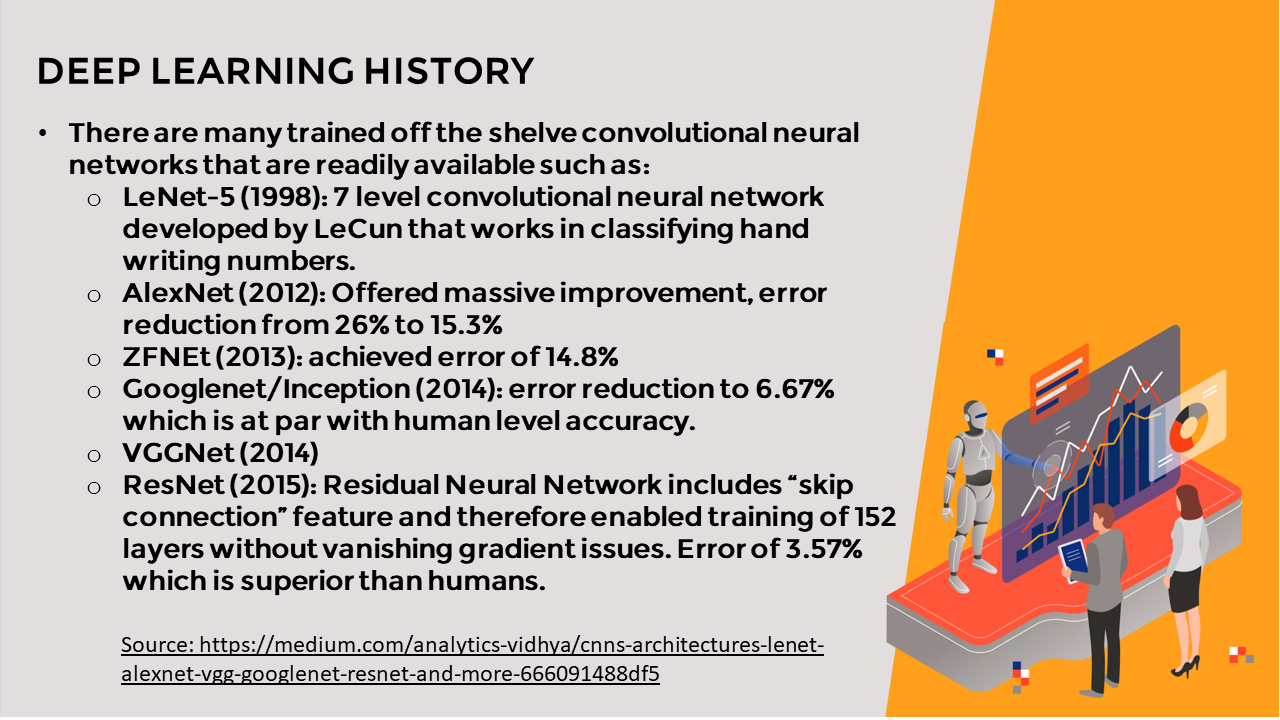

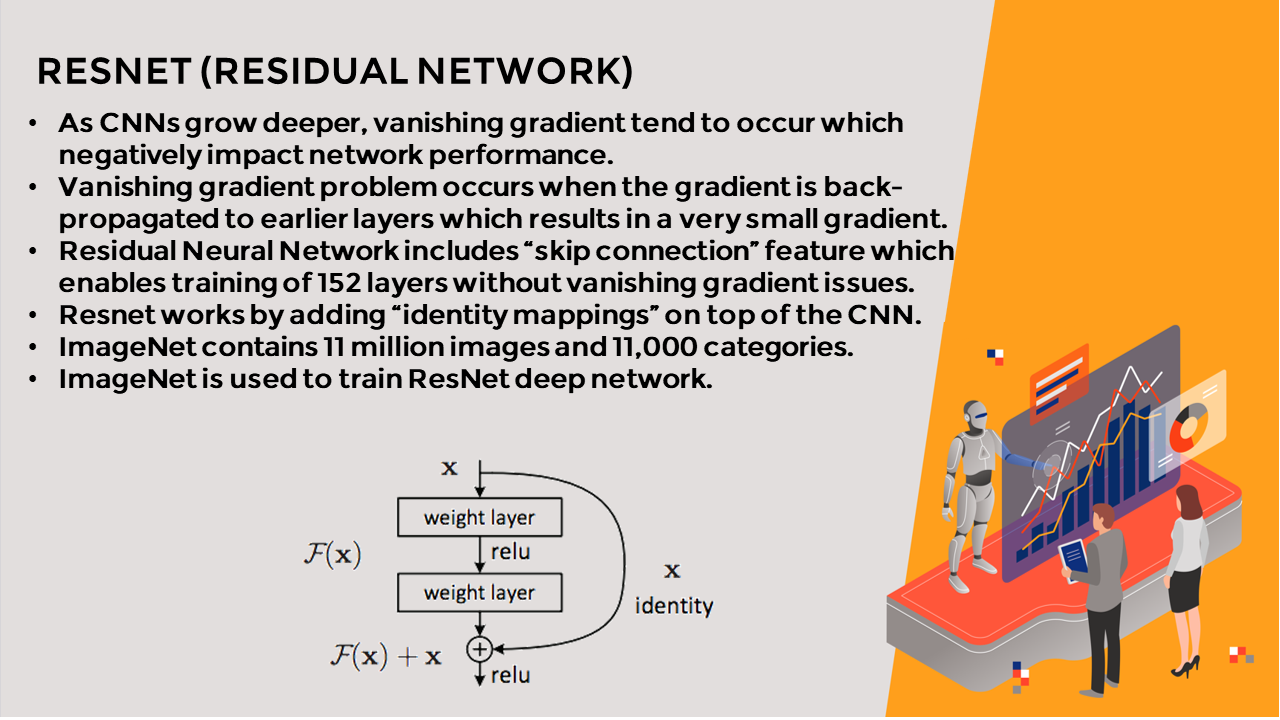

### TASK-5: UNDERSTAND THE THEORY AND INTUITION BEHIND TRANSFER LEARNING

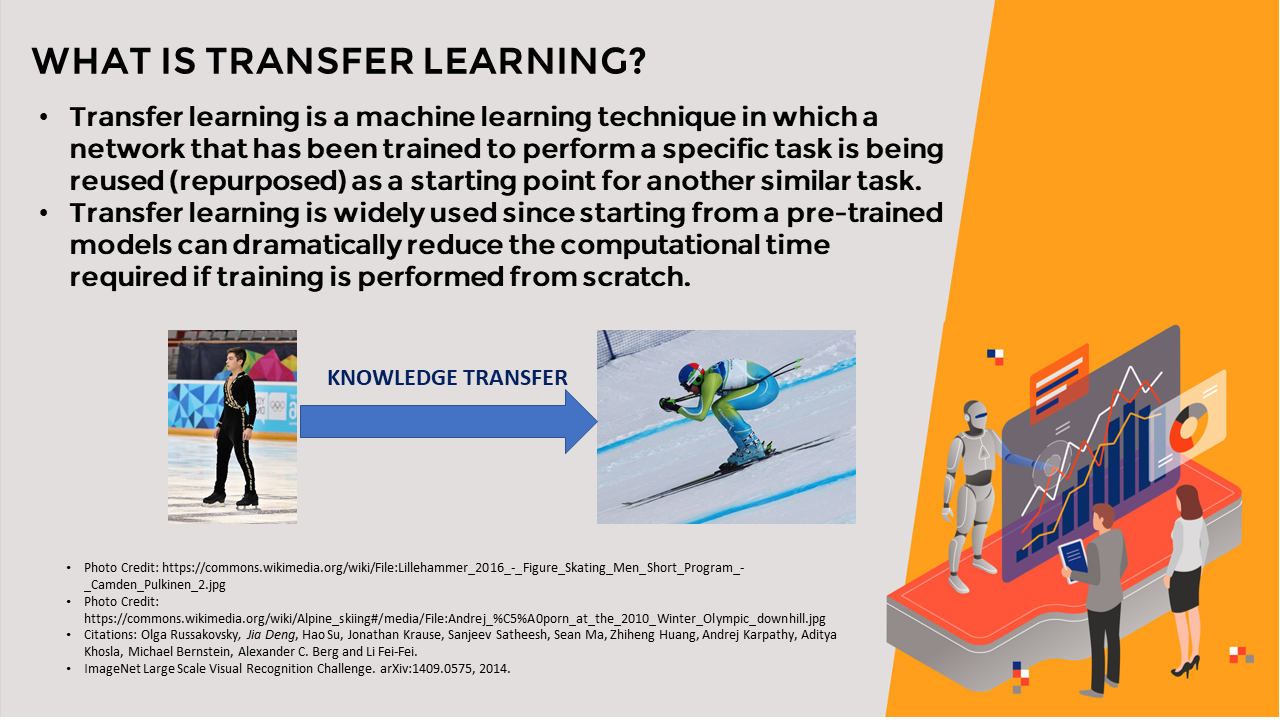

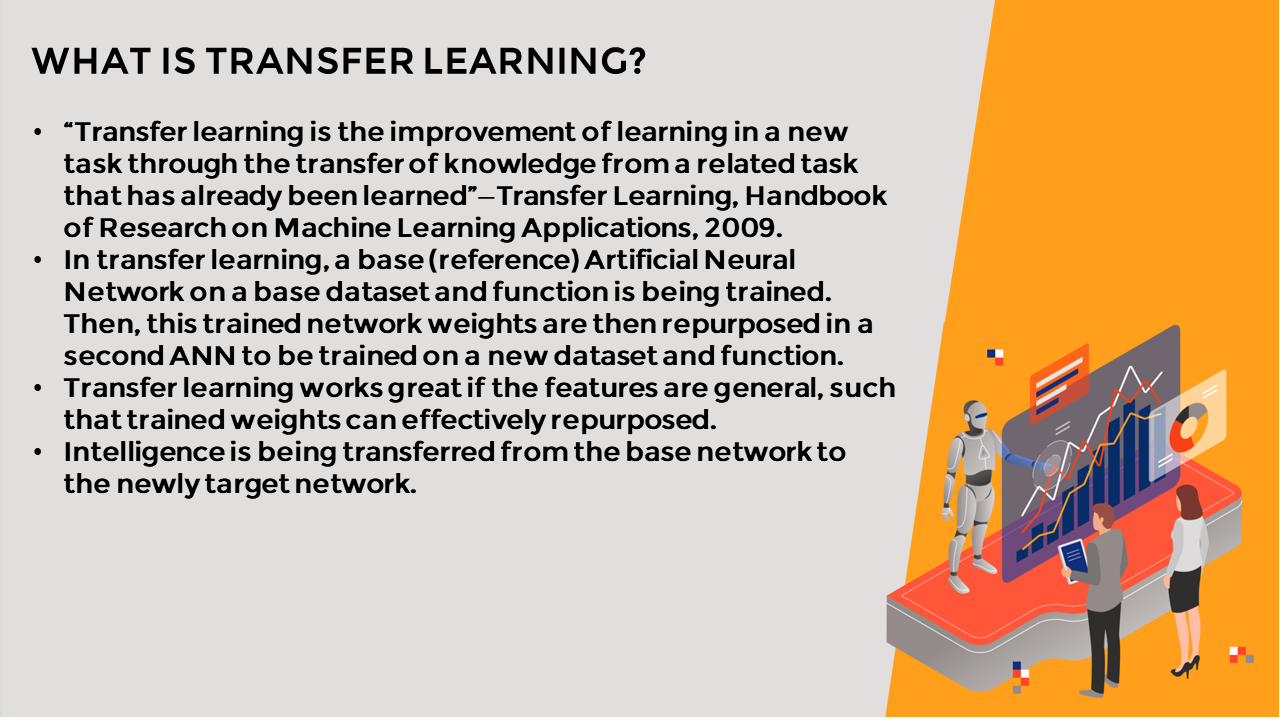

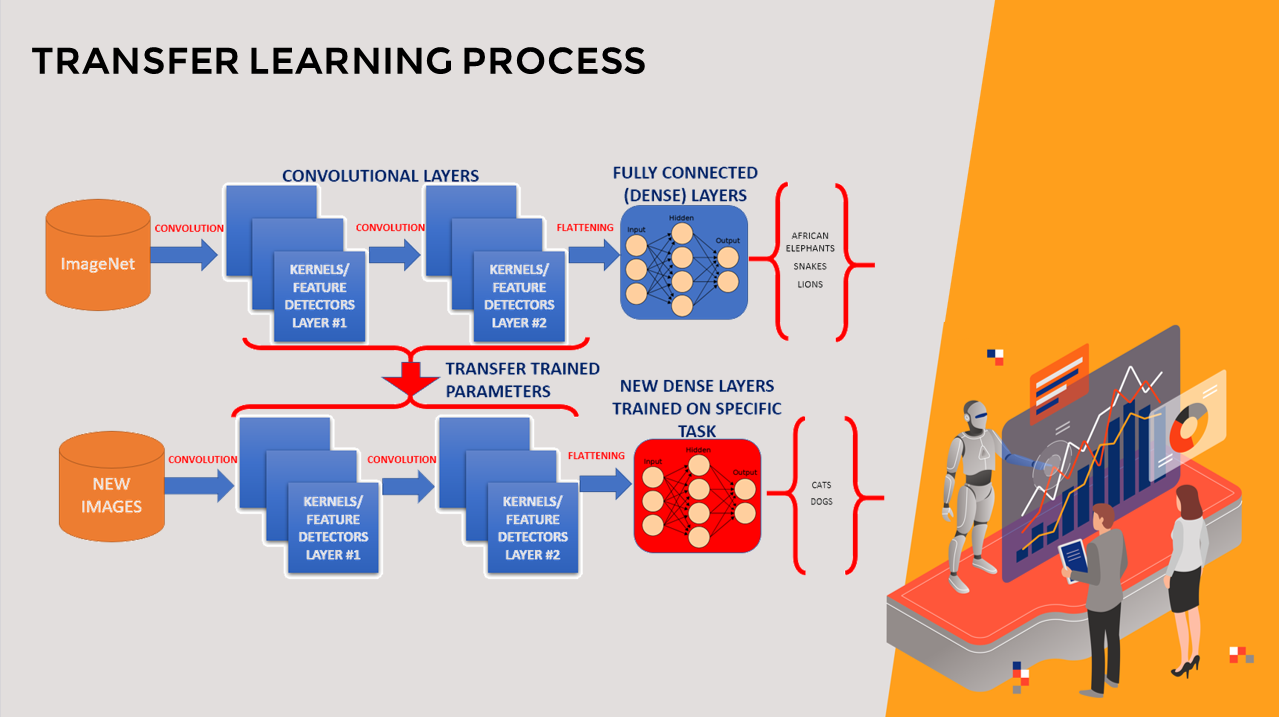

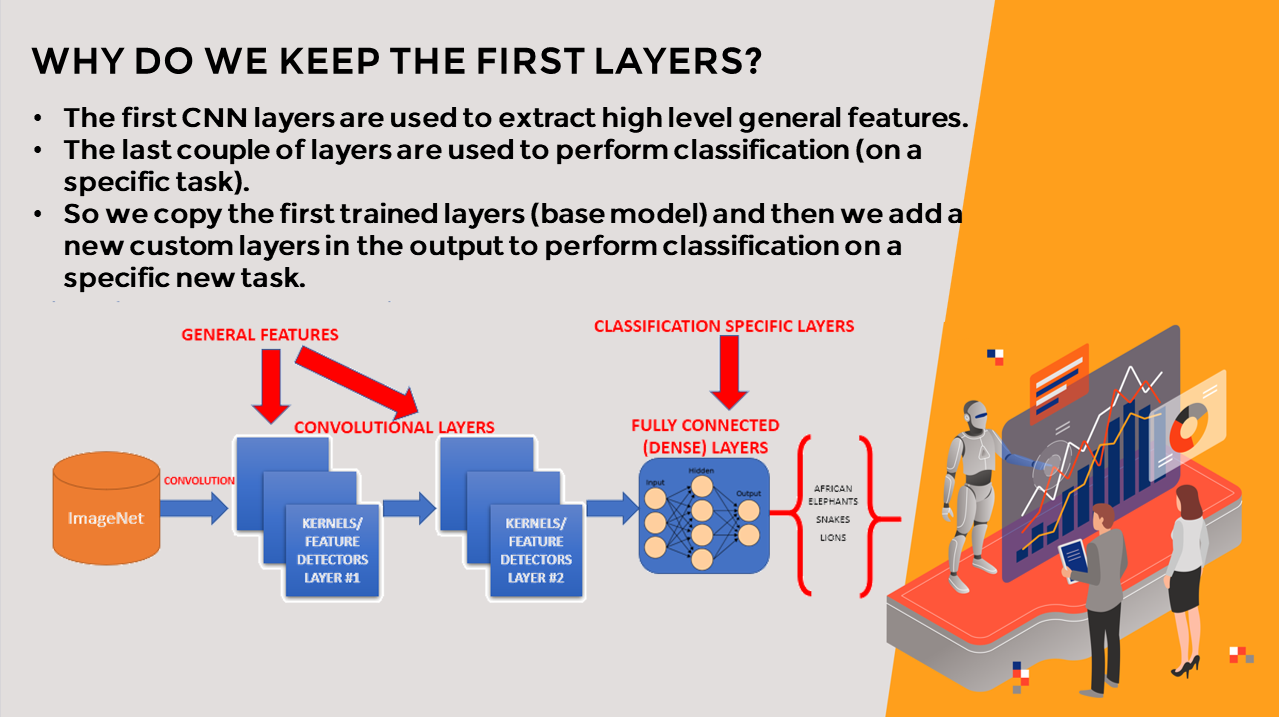

### TASK-6: IMPORT MODEL WITH PRETRAINED WEIGHTS

In [14]:
basemodel = ResNet50(weights= 'imagenet', include_top= False, input_tensor= Input(shape= (256, 256, 3)))

In [15]:
basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 64, 64, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 64, 64, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 64, 64, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 32, 32, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 32, 32, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 32, 32, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 16, 16, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 16, 16, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 16, 16, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 16, 16, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 16, 16, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 16, 16, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 16, 16, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 16, 16, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 16, 16, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 16, 16, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 8, 8, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 8, 8, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 8, 8, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 8, 8, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [16]:
# Freezing the model upto the last stage - 4 and re-training stage - 5
for layer in basemodel.layers[: -10]:
    layers.trainable = False

### TASK-7: BUILD AND TRAIN DEEP LEARNING MODEL

In [17]:
headmodel = basemodel.output
headmodel = AveragePooling2D(pool_size = (4,4))(headmodel)
headmodel = Flatten(name= 'flatten')(headmodel)
headmodel = Dense(256, activation = "relu")(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(128, activation = "relu")(headmodel)
headmodel = Dropout(0.2)(headmodel)
headmodel = Dense(4, activation = 'softmax')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [18]:
model.compile(loss = 'categorical_crossentropy', optimizer=legacy_optimizers.RMSprop(lr = 1e-4, decay = 1e-6), metrics= ["accuracy"])

C:\Users\mani2\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\optimizers\legacy\rmsprop.py:144: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [19]:
# using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor= 'val_loss', mode= 'min', verbose= 1, patience= 20)

# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath= "weights.hdfs", verbose= 1, save_best_only= True)

In [20]:
train_generator = image_generator.flow_from_directory(batch_size= 4, directory= XRay_Directory, shuffle= True,
                                                     target_size= (256, 256), class_mode= 'categorical', subset= 'training')

val_generator = image_generator.flow_from_directory(batch_size= 4, directory= XRay_Directory, shuffle= True,
                                                     target_size= (256, 256), class_mode= 'categorical', subset= 'validation')


Found 428 images belonging to 4 classes.
Found 104 images belonging to 4 classes.


In [ ]:
history = model.fit_generator(train_generator, steps_per_epoch= train_generator.n // 4, epochs = 10, validation_data= val_generator, validation_steps= val_generator.n // 4, callbacks=[checkpointer, earlystopping])

Epoch 1/10


C:\Users\mani2\AppData\Local\Temp/ipykernel_32576/988872660.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, steps_per_epoch= train_generator.n // 4, epochs = 10, validation_data= val_generator, validation_steps= val_generator.n // 4, callbacks=[checkpointer, earlystopping])


107/107 [==============================] - ETA: 0s - loss: 0.8774 - accuracy: 0.6822
Epoch 1: val_loss improved from inf to 10.36788, saving model to weights.hdfs
INFO:tensorflow:Assets written to: weights.hdfs\assets


INFO:tensorflow:Assets written to: weights.hdfs\assets


107/107 [==============================] - 152s 1s/step - loss: 0.8774 - accuracy: 0.6822 - val_loss: 10.3679 - val_accuracy: 0.2500
Epoch 2/10
107/107 [==============================] - ETA: 0s - loss: 0.5420 - accuracy: 0.8201
Epoch 2: val_loss did not improve from 10.36788
107/107 [==============================] - 133s 1s/step - loss: 0.5420 - accuracy: 0.8201 - val_loss: 16.0962 - val_accuracy: 0.2500
Epoch 3/10
107/107 [==============================] - ETA: 0s - loss: 0.3154 - accuracy: 0.8949
Epoch 3: val_loss did not improve from 10.36788
107/107 [==============================] - 135s 1s/step - loss: 0.3154 - accuracy: 0.8949 - val_loss: 13.1641 - val_accuracy: 0.2500
Epoch 4/10
107/107 [==============================] - ETA: 0s - loss: 0.3448 - accuracy: 0.8972
Epoch 4: val_loss did not improve from 10.36788
107/107 [==============================] - 138s 1s/step - loss: 0.3448 - accuracy: 0.8972 - val_loss: 25.3933 - val_accuracy: 0.2500
Epoch 5/10
107/107 [================

INFO:tensorflow:Assets written to: weights.hdfs\assets


107/107 [==============================] - 161s 2s/step - loss: 0.2213 - accuracy: 0.9486 - val_loss: 9.8558 - val_accuracy: 0.2500
Epoch 6/10
107/107 [==============================] - ETA: 0s - loss: 0.1189 - accuracy: 0.9696
Epoch 6: val_loss improved from 9.85584 to 5.04336, saving model to weights.hdfs
INFO:tensorflow:Assets written to: weights.hdfs\assets


INFO:tensorflow:Assets written to: weights.hdfs\assets


107/107 [==============================] - 158s 1s/step - loss: 0.1189 - accuracy: 0.9696 - val_loss: 5.0434 - val_accuracy: 0.2596
Epoch 7/10
107/107 [==============================] - ETA: 0s - loss: 0.2438 - accuracy: 0.9393
Epoch 7: val_loss improved from 5.04336 to 4.52818, saving model to weights.hdfs
INFO:tensorflow:Assets written to: weights.hdfs\assets


INFO:tensorflow:Assets written to: weights.hdfs\assets


107/107 [==============================] - 170s 2s/step - loss: 0.2438 - accuracy: 0.9393 - val_loss: 4.5282 - val_accuracy: 0.3558
Epoch 8/10
107/107 [==============================] - ETA: 0s - loss: 0.0388 - accuracy: 0.9883
Epoch 8: val_loss improved from 4.52818 to 3.44517, saving model to weights.hdfs
INFO:tensorflow:Assets written to: weights.hdfs\assets


INFO:tensorflow:Assets written to: weights.hdfs\assets


107/107 [==============================] - 159s 1s/step - loss: 0.0388 - accuracy: 0.9883 - val_loss: 3.4452 - val_accuracy: 0.4038
Epoch 9/10
107/107 [==============================] - ETA: 0s - loss: 0.0910 - accuracy: 0.9766
Epoch 9: val_loss did not improve from 3.44517
107/107 [==============================] - 161s 2s/step - loss: 0.0910 - accuracy: 0.9766 - val_loss: 5.0525 - val_accuracy: 0.6058
Epoch 10/10
 93/107 [=========================>....] - ETA: 18s - loss: 0.1210 - accuracy: 0.9785

### TASK-8: EVALUATE TRAINED DEEP LEARNING MODEL

In [ ]:
history.history.keys()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])

plt.title('Model Loss and Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy and Loss')
plt.legend('Training Accuracy', 'Training Loss')

In [ ]:
plt.plot(history.history['val_loss'])
plt.title('Model Loss During Cross-Validation')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend('Validation Loss')

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Progress During Cross-Validation')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend('Validation Accuracy')

In [ ]:
test_directory = r'C:\Users\mani2\Documents\Data Science For Business\datasets\Operations_data\Chest_X_Ray\Test'

In [ ]:
test_gen = ImageDataGenerator(rescale= 1./255)

test_generator = test_gen.flow_from_directory(batch_size= 40, directory= test_directory, shuffle= True,
                                             target_size= (256, 256), class_mode= 'categorical')

evaluate = model.evaluate_generator(test_generator, steps= test_generator.n // 4, verbose= 1)

print('Accuracy Test: {}'.format(evaluate[1]))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

prediction = []
original = []
image = []

for i in range(len(os.listdir(test_directory))):
    for item in os.listdir(os.path.join(test_directory, str(i))):
        img = cv2.imread(os.path.join(test_directory, str(i), item))
        img = cv2.resize(img, (256, 256))
        image.append(img)
        img = img / 255
        img = img.reshape(-1, 256, 256, 3)
        predict = model.predict(img)
        predict = np.argmax(predict)
        prediction.append(predict)
        original.append(i)

In [ ]:
len(original)

In [ ]:
score = accuracy_score(original, prediction)
print("Test Accuracy: {}".format(score))

In [ ]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(image[i])
    axes[i].set_title('Guess={}\nTrue={}'.format(str(label_names[prediction[i]]), str(label_names[original[i]])))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1.2) 

In [ ]:
print(classification_report(np.asarray(original), np.asarray(prediction)))

In [ ]:
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')

### END